In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dataset_path = "/content/drive/MyDrive/dataset/train_preprocessed.txt"
test_dataset_path = "/content/drive/MyDrive/dataset/test_preprocessed.txt"

In [ ]:
df_train = pd.read_csv(train_dataset_path, sep="\t")
df_test = pd.read_csv(test_dataset_path, sep="\t")

df_train.head()

,index,label,text
0,1,1,sweet united nations video. just in time for c...
1,2,1,@user we are rumored to have talked to erv's a...
2,3,1,hey there! nice to see you minnesota/nd winter...
3,4,0,3 episodes left i'm dying over here
4,5,1,i can't breathe! was chosen as the most notabl...


0    1916
1    1901
Name: label, dtype: int64


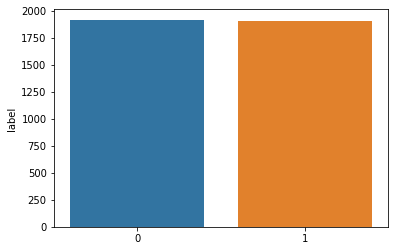

In [ ]:
x=df_train['label'].value_counts()
print(x)
sns.barplot(x.index,x)

0    473
1    311
Name: label, dtype: int64


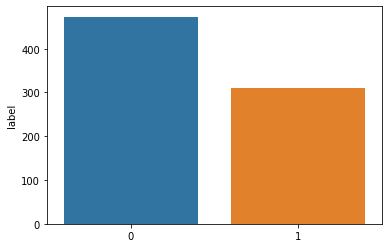

In [ ]:
x=df_test['label'].value_counts()
print(x)
sns.barplot(x.index,x)

In [ ]:
# Change next line if using another preproccesing
df_train['clean_text'] = df_train['text']
df_test['clean_text'] = df_test['text']

df_train.head()

,index,label,text,clean_text
0,1,1,sweet united nations video. just in time for c...,sweet united nations video. just in time for c...
1,2,1,@user we are rumored to have talked to erv's a...,@user we are rumored to have talked to erv's a...
2,3,1,hey there! nice to see you minnesota/nd winter...,hey there! nice to see you minnesota/nd winter...
3,4,0,3 episodes left i'm dying over here,3 episodes left i'm dying over here
4,5,1,i can't breathe! was chosen as the most notabl...,i can't breathe! was chosen as the most notabl...


In [ ]:
X_train = df_train["clean_text"]
X_test = df_test["clean_text"]
y_train = df_train["label"]
y_test = df_test["label"]


##TF-IDF

In [ ]:

#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf = tfidf_vectorizer.transform(X_test) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.71      0.70      0.70       473
           1       0.55      0.56      0.55       311

    accuracy                           0.64       784
   macro avg       0.63      0.63      0.63       784
weighted avg       0.64      0.64      0.64       784

Confusion Matrix: [[330 143]
 [137 174]]
AUC: 0.6948328722051895


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
#It's a probabilistic classifier that makes use of Bayes' Theorem, a rule that uses probability to make predictions based on prior knowledge of conditions that might be related. This algorithm is the most suitable for such large dataset as it considers each feature independently, calculates the probability of each category, and then predicts the category with the highest probability.

nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.74      0.66      0.69       473
           1       0.55      0.64      0.59       311

    accuracy                           0.65       784
   macro avg       0.64      0.65      0.64       784
weighted avg       0.66      0.65      0.66       784

Confusion Matrix: [[311 162]
 [111 200]]
AUC: 0.7116782118651557


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Radnom Forest (tf-idf)
clf = RandomForestClassifier()
clf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = clf.predict(X_val_vectors_tfidf)
y_prob = clf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       473
           1       0.57      0.62      0.59       311

    accuracy                           0.67       784
   macro avg       0.65      0.66      0.66       784
weighted avg       0.67      0.67      0.67       784

Confusion Matrix: [[330 143]
 [119 192]]
AUC: 0.7076266289606602


##Word2vec

In [ ]:
X_train_tok= [word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [word_tokenize(i) for i in X_test]      #for word2vec

#Word2vec
# Fit and transform
df_train['clean_text_tok']=[nltk.word_tokenize(i) for i in df_train['clean_text']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(df_train['clean_text_tok'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it


w2v = dict(zip(model.wv.index2word, model.wv.syn0))  #combination of word and its vector

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       473
           1       0.39      0.35      0.37       311

    accuracy                           0.53       784
   macro avg       0.50      0.50      0.50       784
weighted avg       0.52      0.53      0.52       784

Confusion Matrix: [[304 169]
 [201 110]]
AUC: 0.5354479514353887


In [ ]:
#FITTING THE CLASSIFICATION MODEL using Radnom Forest (W2v)
clf = RandomForestClassifier()
clf.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = clf.predict(X_val_vectors_w2v)
y_prob = clf.predict_proba(X_val_vectors_w2v)[:,1]
 

print(classification_report(y_test,y_predict))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       473
           1       0.43      0.42      0.43       311

    accuracy                           0.55       784
   macro avg       0.53      0.53      0.53       784
weighted avg       0.55      0.55      0.55       784

Confusion Matrix: [[301 172]
 [179 132]]
AUC: 0.5573271789154537
